# Lab: Exploratory Data Analysis (EDA)

![](figs/eda.png)

In this lab session, we will explore the mC4 dataset and perform an Exploratory Data Analysis (EDA) to better understand the data's properties, distribution, and potential applications. We'll be using Python, and the Hugging Face `datasets` library.

## Setting up the environment

First, make sure to install the required packages:


In [ ]:
%pip install datasets matplotlib seaborn pandas

## Load the mC4 dataset

To start, let's load the mC4 dataset for a specific language, say Korean:


In [3]:
from datasets import load_dataset

ko_mc4 = load_dataset("mc4", "ko")

Found cached dataset mc4 (/home/yjlee/.cache/huggingface/datasets/mc4/ko/0.0.0/99acea4a740b4cc36e4a93a238c7de11b0ce341d65b7d37168b3b90fd64721d2)

 50%|█████     | 1/2 [6:54:23<6:54:23, 24863.55s/it]

100%|██████████| 2/2 [00:00<00:00,  5.57it/s]


## Analyzing the dataset

Now that we have loaded the dataset, let's analyze its structure and content:


In [4]:
print(ko_mc4)


DatasetDict({
    train: Dataset({
        features: ['text', 'timestamp', 'url'],
        num_rows: 15602947
    })
    validation: Dataset({
        features: ['text', 'timestamp', 'url'],
        num_rows: 15771
    })
})


This will provide you with information about the dataset splits (train, validation, and test).

### Data Instances

Let's examine some instances of the dataset:


In [7]:
sample = ko_mc4["train"][100]
print(sample)


{'text': '포르쉐코리아, 순수 전기 스포츠카 ‘포르쉐 타이칸(Porsche Taycan)’ 국내 최초 공개 : 다나와 DPG는 내맘을 디피지\n2019.11.08 15:49:13\nhttp://dpg.danawa.com/news/view?boardSeq=60&listSeq=4061099&companySeq=33 복사\n1 내가 먹고 싶어서 쓴 투썸플레이스 ...', 'timestamp': '2019-11-17T09:25:51Z', 'url': 'http://dpg.danawa.com/news/view?boardSeq=60&listSeq=4061099&companySeq=33'}


Observe the structure of the data instance, which contains the `url`, `text`, and `timestamp`.

### Basic statistics

Now let's compute some basic statistics, such as the number of instances in each split:


In [8]:
print("Number of instances:")
for split in ko_mc4.keys():
    print(f"{split}: {len(ko_mc4[split])}")

Number of instances:
train: 15602947
validation: 15771


## Text length distribution

To understand the text length distribution, we'll create a histogram using `matplotlib` and `seaborn`:


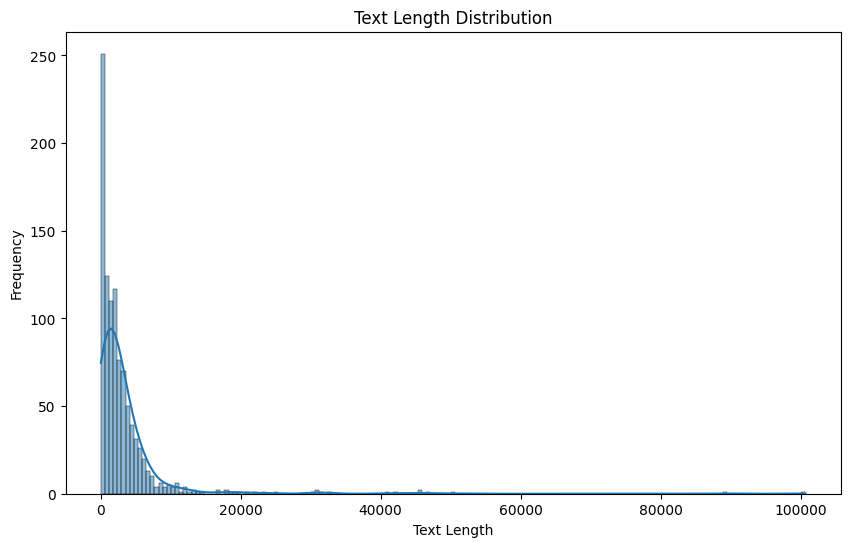

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load a sample of the dataset
sample_size = 1000
sample_data = [ko_mc4["train"][i]["text"] for i in range(sample_size)]

# Calculate the length of each text instance
text_lengths = [len(text) for text in sample_data]

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

This plot will show the distribution of text lengths in the dataset, which can be useful for understanding the variety of content lengths and setting appropriate sequence lengths for language models.

### Timestamp distribution

To analyze the timestamp distribution, we'll create a time series plot:


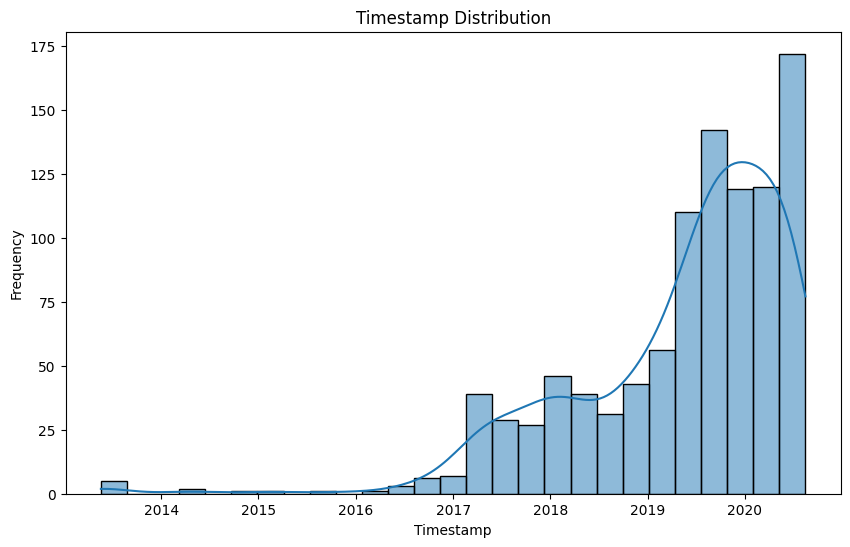

In [10]:
# Load a sample of the dataset
timestamps = [
    pd.to_datetime(ko_mc4["train"][i]["timestamp"]) for i in range(sample_size)
]

# Create a time series plot
plt.figure(figsize=(10, 6))
sns.histplot(timestamps, kde=True)
plt.title("Timestamp Distribution")
plt.xlabel("Timestamp")
plt.ylabel("Frequency")
plt.show()


This plot provides insights into the distribution of timestamps in the dataset, which can be useful for understanding the temporal coverage of the data.

## Conclusion

In this lab session, we've performed an Exploratory Data Analysis (EDA) on the mC4 dataset to better understand its properties, distribution, and potential applications. By analyzing the dataset's structure, content, text length distribution, and timestamp distribution, we can make informed decisions about how to preprocess and use the data for various natural language processing tasks.
